#  Анализ данных компьютерных игр интернет-магазина "Стримчик"

**В нашем распоряжении данные о продажах компьютерных игр интернет-магазина "Стримчик" до 2016 года. Задача - проанализировать данные и выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

Импортируем библиотеки, которые могут нам понадобиться в ходе выполнения работы

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt 
import datetime
import calendar
import seaborn
from scipy import stats as st
from math import sqrt
from importlib import reload

# Шаг 1. Загрузка данных

Загрузим и прочитаем предоставленный нам файл `/datasets/games.csv`, а также выведем основные сведения о нем

In [2]:
games=pd.read_csv('/datasets/games.csv') 
display(games)
games.info()
games.describe()
games.isna().sum()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Мы имеем массив данных в размере 16715 наблюдений с 1980 по 2016 года со следующими столбцами и соответствующими сведениями:

`Name` с названием игры (есть пропуски)

`Platform` с обозначением платформы

`Year_of_Release` с годом выпуска (есть пропуски)

`Genre` с обозначением жанра (есть пропуски)
 
`NA_sales` с продажами в Северной Америке (в миллионах проданных копий)

`EU_sales` с продажами в Европе (в миллионах проданных копий)

`JP_sales` с продажами в Японии (в миллионах проданных копий)

`Other_sales` с продажами в других странах (в миллионах проданных копий)

`Critic_Score` с оценками критиков (с максимум 100) (есть пропуски)

`User_Score` с оценками пользователей (с максимумом 10) (есть пропуски)

`Rating` с рейтингом от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. (есть пропуски)


Мы видим, что в данных есть недочеты, требущие корректировки, а именно: стоит заменить названия столбцов (привести к нижнему регистру); преобразовать данные в столбцах `Year_of_Release`, `User_Score` в нужные типы; обработать пропуски в данных. Предобработка данных осуществляется на Шаге 2.

# Шаг 2. Предобработка данных

**Приведение названий столбцов к нижнему регистру**

In [3]:
games.columns=games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Работа с пропусками в данных**

На Шаге 1 мы обнаружили, что в определенных столбцах есть пропуски: в столбце `year_of_release` их 269, в столбцах `name` и `genre` их по 2. Предлагается такие пропуски удалить: в сравнении с размером общей выборки их мало, на общий результат удаление строк с такими пропусками не повлияет, а надежно восстановить их нельзя.

В столбцах `critic_Score`, `user_score`, `rating` пропусков для удаления слишком много. Заменять на какие-либо значения пока также рискованно. Среди причин может быть отсутствие изначальных свдений, пользователь/критик мог(-ли) пока не проставить оценку. Кроме того, среди причин появления пропусков в данных можно также перечислить человеческий фактор, технические неполадки, сбой при записи данных, распознавание текста, объединение/разъединение данных (наример, табличных). Необзодимо отметить и субъективную составляющую в прставлении оценки - заменить такие значения на средние неправильно (мы не знаем, какие оценки проставил бы человек и проставил ли он их вообще). В любом случае, восстановить данные или достоверно заменить пропуски в перечисленных 3 столбцах нельзя, предлагается пропуски оставить.

In [4]:
# Проверим уникальные значение в столбце year_of_release:
games['year_of_release'].unique()
# Удалим пропуски:
games=games.dropna(subset=['year_of_release'])
games=games.dropna(subset=['name'])
games.isna().sum()
# Проверим уникальные значение в столбце user_score:
games['user_score'].unique()
# Увидели, что есть обозначение "tbd"
# tbd заменим на nan:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['critic_score'].unique()
games['rating'].unique()
games.isna().sum()
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


В столбце `user_score` мы увидели значения 'tbd', что обозначет 'to be determined', то есть данные об оценке пользователей пока отсутствуют. Предлагается заменить такие значения на 'nan'. Кроме того, при удалении строк с пропусками в столбце `name`, пропали также строки с пропусками в столбце `genre`, по всей видимости это были одни и те же строки с пропусками одновременно в двух столбцах.

По результатам работы с пропусками у нас осталось 16444 наблюдений, это 98,4% изначальных данных, что некритично для дальнешего анализа. Предлагается идти дальше.

Также стоит отметить, что на данном этапе был изменен тип данных `user_score`. И это верно, ведь `object` к числовым данным применять неразумно, а 'tbd' были заменены на 'nan'.

**Работа с типами данных**

Изменим тип данных в столбце `year_of_release`, ведь здесь обозначется год выпуска и он не может быть десятичным значением.
С типом данных столбца `user_score` работа проведена на этапе обработки с пропусками.

In [5]:
games['year_of_release']=games['year_of_release'].astype('Int64')
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Проверка наличия дубликатов**

Проверим наличие явных дубликатов

In [6]:
games.duplicated().sum()

0

Явные дубликаты (полностью повторяющиеся строки) отсутствуют

Теперь проверим неявные дубликаты в следующих столбцах:

In [53]:
print(games['name'].unique())
print(games['platform'].unique())
print(games['year_of_release'].unique())
print(games['genre'].unique())

['Grand Theft Auto V' 'Call of Duty: Black Ops 3' 'Pokemon X/Pokemon Y'
 ... 'Strawberry Nauts' 'Aiyoku no Eustia' 'Haitaka no Psychedelica']
['PS3' 'X360' 'PS4' '3DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'DS' 'PSP']
<IntegerArray>
[2013, 2015, 2014, 2016]
Length: 4, dtype: Int64
['Action' 'Shooter' 'Role-Playing' 'Misc' 'Sports' 'Fighting' 'Racing'
 'Simulation' 'Platform' 'Strategy' 'Adventure' 'Puzzle']


Неявных дубликатов на данном этапе не выявлено. Проверять уникальные значения в оставшихся столбцах нецелесообразно. Стоит так же сказать, что не каждый дубликат - это ошибка. Даже если мы найдем повторения в наименовании игр, то возможно там будет другая платформа или другие оценки пользователей. Предлагается идти дальше.

**Cуммарные продажи во всех регионах**

In [8]:
# Создадим новый столбец с суммарными продажами во всех регионах:
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


На Шаге 2 мы осуществили предобработку данных: привели к нижнему регистру названия столбцов; изменили тип данных в столбцах `year_of_release` и `user_score`; обработали пропуски в тех столбцах, где это было возможно (в столбцах `name`, `genre`, `year_of_release`); создали новый столбец `total_sales `с суммарными продажами во всех регионах, а также осуществили проверку наличия дубликатов.

Предобработку данных предлагается на данном этапе завершить и переходить к исследовательскому анализу данных на Шаг 3.

# Шаг 3. Исследовательский анализ данных

**Сколько игр выпускалось в разные годы?**

Text(0, 0.5, 'Количество выпущенных игр')

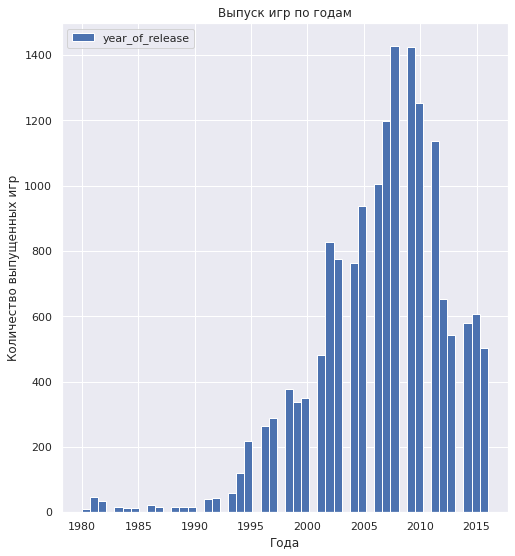

In [9]:
games.describe()
seaborn.set(rc={'figure.figsize':(11.7, 8.27)})
ax=games.plot(y='year_of_release', kind='hist', bins=50, grid=True, range=(1980, 2016), figsize=(8,9), title='Выпуск игр по годам')
ax.set_xlabel("Года")
ax.set_ylabel("Количество выпущенных игр")

В основном игры выпускались в период примерно с 2005 по 2011 года. Пик пришелся на 2008 год, когда было выпущено около 1400 игр.
Игр с 1980 1990 (и чуть позже) выпускалось крайне мало. Определенный спад наблюдается после 2011 года: показатель 2011 года (более 1100 игр) опустился до чуть более 600 игр в 2012 году. Возможно, такой спад связан с финансовым кризисом. 

**Динамика продаж по платформам, учитывая распределение по годам** 

Сначала построим таблицу с данными о платформах и суммарных продажах, не учитывая сортировку по годам. Затем выберем топ-10 платформ по наибольшему количеству продаж. Также построим график продаж по топ-10 платформам (опять же, года пока не учитываем).

In [10]:
pivot=games.pivot_table(index=['platform'], values='total_sales', aggfunc=['sum']).reset_index()
pivot.columns=['platform', 'total_sales']
pivot=pivot.sort_values('total_sales', ascending = False)
pivot_top_10=pivot.query('total_sales > 255.77')
display(pivot_top_10)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Text(0, 0.5, 'Продажи, млн проданных копий')

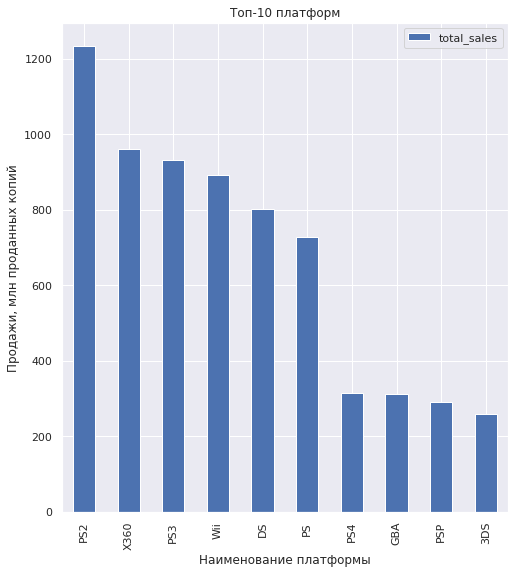

In [11]:
ax=pivot_top_10.plot(x='platform', y='total_sales', kind='bar', figsize=(8,9), title='Топ-10 платформ')
ax.set_xlabel("Наименование платформы")
ax.set_ylabel("Продажи, млн проданных копий")

Такая визуализация по оси X показывает топ-10 наиболее "продаваемых" платформ за все года в выборке. Самой популярной оказалась PS2, было продано более 1,2 млрд копий; затем следует платформа X360, где было продано около 1 млрд копий.

Теперь построим датафрейм с сортировкой всех платформ по годам, учитывая суммарные продажи.

In [12]:
pivot_with_years=games.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc=['sum']).reset_index()
pivot_with_years.columns=['platform', 'year_of_release','total_sales']
pivot_with_years

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


Зная топ-10 самых "продаваемых" платформ, можно визуализировать их распределение по годам, учитывая суммарные продажи по всем регионам.

In [13]:
PS2_data=pivot_with_years.loc[pivot_with_years.loc[:, 'platform']=='PS2']
PS2_data

,platform,year_of_release,total_sales
130,PS2,2000,39.17
131,PS2,2001,166.43
132,PS2,2002,205.38
133,PS2,2003,184.31
134,PS2,2004,211.81
135,PS2,2005,160.66
136,PS2,2006,103.42
137,PS2,2007,75.99
138,PS2,2008,53.90
139,PS2,2009,26.40


Text(0, 0.5, 'Продажи, млн проданных копий')

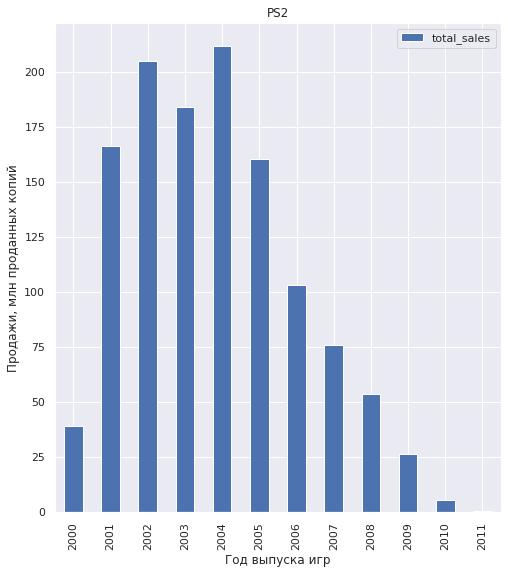

In [14]:
ax=PS2_data.plot(x='year_of_release', y='total_sales', kind='bar', figsize=(8,9), title='PS2')
ax.set_xlabel("Год выпуска игр")
ax.set_ylabel("Продажи, млн проданных копий")

Платформа PS2 продала наибольшее количество игр в период с 2001 по 2005 года, пик пришелся на 2004 год.

Text(0, 0.5, 'Продажи, млн проданных копий')

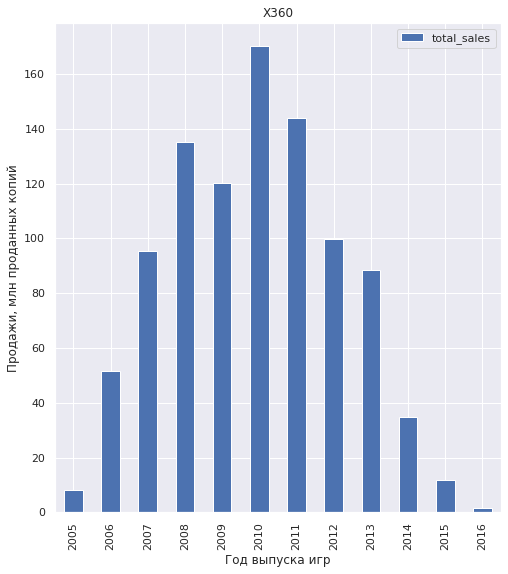

In [15]:
X360_data=pivot_with_years.loc[pivot_with_years.loc[:, 'platform']=='X360']
X360_data
ax=X360_data.plot(x='year_of_release', y='total_sales', kind='bar', figsize=(8,9), title='X360')
ax.set_xlabel("Год выпуска игр")
ax.set_ylabel("Продажи, млн проданных копий")

Платформа X360 продала наибольшее количество игр в период с 2008 по 2011 года, пик пришелся на 2010 год.

Text(0, 0.5, 'Продажи, млн проданных копий')

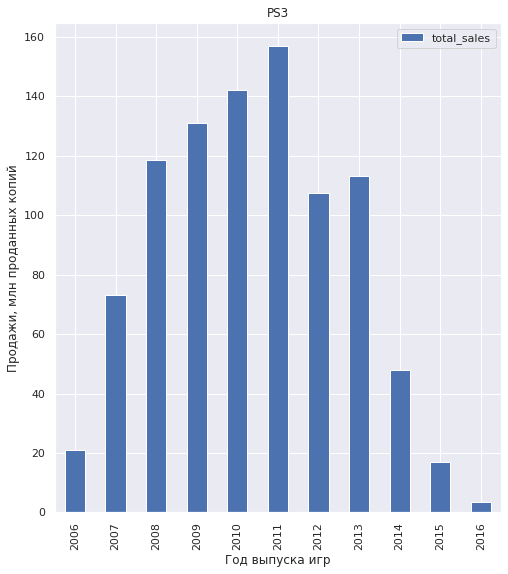

In [16]:
PS3_data=pivot_with_years.loc[pivot_with_years.loc[:, 'platform']=='PS3']
PS3_data
ax=PS3_data.plot(x='year_of_release', y='total_sales', kind='bar', figsize=(8,9), title='PS3')
ax.set_xlabel("Год выпуска игр")
ax.set_ylabel("Продажи, млн проданных копий")

Платформа PS3 продала наибольшее количество игр в период с 2008 по 2011 года, пик пришелся на 2011 год.

Text(0, 0.5, 'Продажи, млн проданных копий')

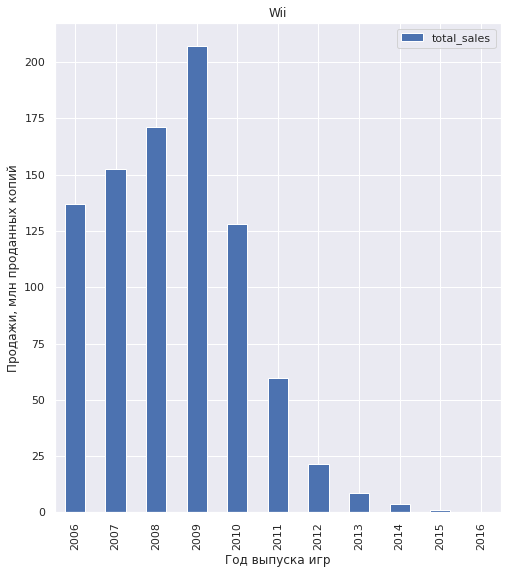

In [17]:
Wii_data=pivot_with_years.loc[pivot_with_years.loc[:, 'platform']=='Wii']
Wii_data
ax=Wii_data.plot(x='year_of_release', y='total_sales', kind='bar', figsize=(8,9), title='Wii')
ax.set_xlabel("Год выпуска игр")
ax.set_ylabel("Продажи, млн проданных копий")

Платформа Wii продала наибольшее количество игр в период в 2008-2009 годах, пик пришелся на 2009.

Text(0, 0.5, 'Продажи, млн проданных копий')

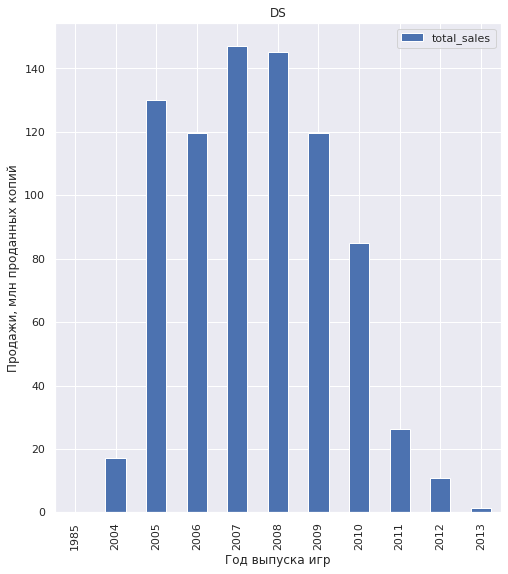

In [18]:
DS_data=pivot_with_years.loc[pivot_with_years.loc[:, 'platform']=='DS']
DS_data
ax=DS_data.plot(x='year_of_release', y='total_sales', kind='bar', figsize=(8,9), title='DS')
ax.set_xlabel("Год выпуска игр")
ax.set_ylabel("Продажи, млн проданных копий")

Платформа DS продала наибольшее количество игр в период 2005-2009 годах, пик пришелся на 2007.

Text(0, 0.5, 'Продажи, млн проданных копий')

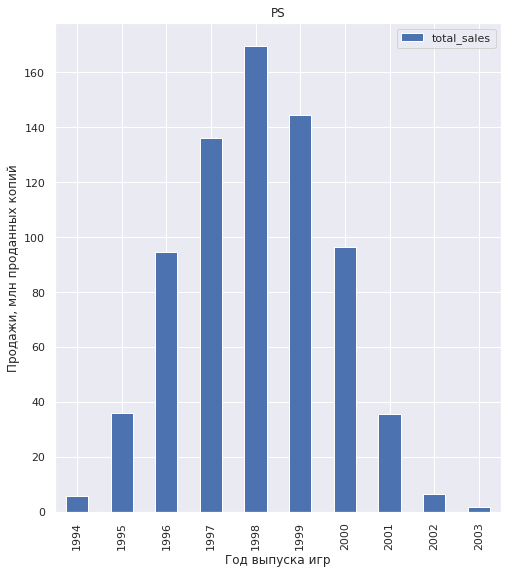

In [19]:
PS_data=pivot_with_years.loc[pivot_with_years.loc[:, 'platform']=='PS']
PS_data
ax=PS_data.plot(x='year_of_release', y='total_sales', kind='bar', figsize=(8,9), title='PS')
ax.set_xlabel("Год выпуска игр")
ax.set_ylabel("Продажи, млн проданных копий")

Платформа PS продала наибольшее количество игр в период 1997-1999 годах, пик пришелся на 1998.

Text(0, 0.5, 'Продажи, млн проданных копий')

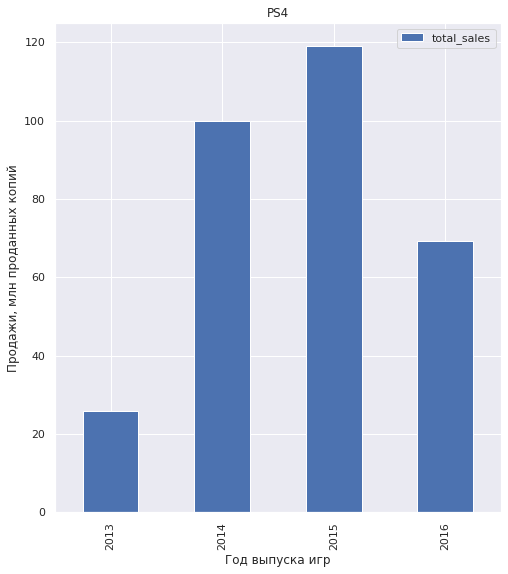

In [20]:
PS4_data=pivot_with_years.loc[pivot_with_years.loc[:, 'platform']=='PS4']
PS4_data
ax=PS4_data.plot(x='year_of_release', y='total_sales', kind='bar', figsize=(8,9), title='PS4')
ax.set_xlabel("Год выпуска игр")
ax.set_ylabel("Продажи, млн проданных копий")

Платформа PS4 продала наибольшее количество игр в 2015 году

Text(0, 0.5, 'Продажи, млн проданных копий')

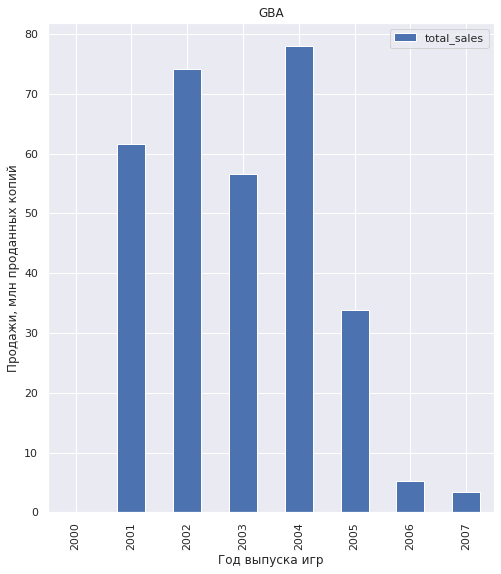

In [21]:
GBA_data=pivot_with_years.loc[pivot_with_years.loc[:, 'platform']=='GBA']
GBA_data
ax=GBA_data.plot(x='year_of_release', y='total_sales', kind='bar', figsize=(8,9), title='GBA')
ax.set_xlabel("Год выпуска игр")
ax.set_ylabel("Продажи, млн проданных копий")

Платформа GBA продала наибольшее количество игр в 2002 и 2004 годах.

Text(0, 0.5, 'Продажи, млн проданных копий')

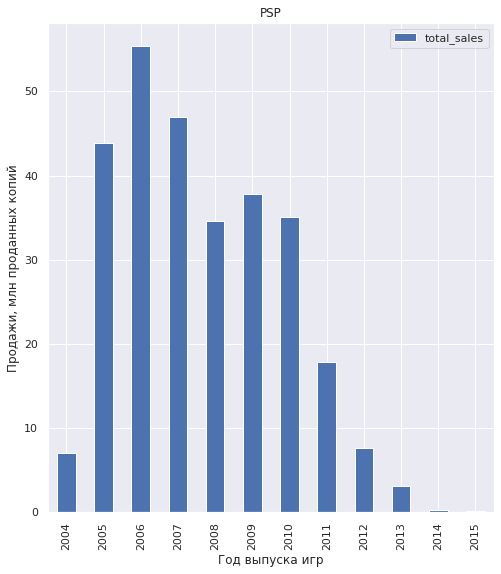

In [22]:
PSP_data=pivot_with_years.loc[pivot_with_years.loc[:, 'platform']=='PSP']
PSP_data
ax=PSP_data.plot(x='year_of_release', y='total_sales', kind='bar', figsize=(8,9), title='PSP')
ax.set_xlabel("Год выпуска игр")
ax.set_ylabel("Продажи, млн проданных копий")

Платформа PSP продала наибольшее количество игр в период 2005-2007 годов, пик пришелся на 2006

Text(0, 0.5, 'Продажи, млн проданных копий')

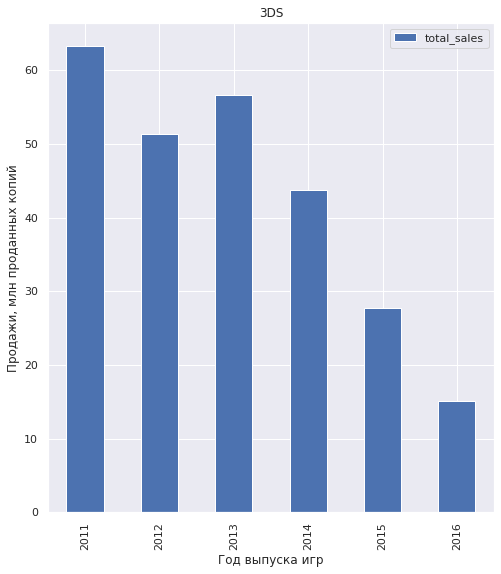

In [23]:
DS3_data=pivot_with_years.loc[pivot_with_years.loc[:, 'platform']=='3DS']
DS3_data
ax=DS3_data.plot(x='year_of_release', y='total_sales', kind='bar', figsize=(8,9), title='3DS')
ax.set_xlabel("Год выпуска игр")
ax.set_ylabel("Продажи, млн проданных копий")

Платформа 3DS продала наибольшее количество игр в период 2011-2013 годов, пик пришелся на 2011

Подводя итог построенным графикам, можно сказать, что в нашей выборке наибольшее количество продаж всех игр (вне зависимости от платформы) происходило в период 2005-2011 годов. После этого наблюдается резкий спад и пиковые значения уже не достигаются. Учитывая экономическую ситуацию 2008-2010 и последующих годов, нельзя с уверенностью утверждать, что выборка, например, за 2012-2015 репрезентативна и делать прогноз только по ней.
По моему мнению, для осуществления более точного прогноза необходимо больше данных. Поэтому для осуществления прогноза на 2017 год за актуальный период стоит взять некий среднесрочный период, например за 10 лет: 2006-2016 года.

Продолжим работать с данными от 2013 года

In [24]:
# Оставим в выборке данные "младше" 2012 года:
games.query('year_of_release > 2012')
games = games[(games.year_of_release > 2012)]
display(games)
# Проверим:
games['year_of_release'].unique()
# В выборке действительно остались данные только за 2013-2016 года
games.info()
# Теперь наблюдений 2233

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


Построим агрегированный датасет, в котором будут отображены платформа, года выпуска игр (от 2013), а также суммарные показатели продаж.

In [25]:
pivot_new=games.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc=['sum']).reset_index()
pivot_new.columns=['platform', 'year_of_release', 'total_sales']
pivot_new=pivot_new.sort_values('year_of_release', ascending = False)
pivot_new

,platform,year_of_release,total_sales
39,XOne,2016,26.15
35,X360,2016,1.52
27,Wii,2016,0.18
3,3DS,2016,15.14
23,PSV,2016,4.25
8,PC,2016,5.25
16,PS4,2016,69.25
31,WiiU,2016,4.60
12,PS3,2016,3.60
26,Wii,2015,1.14


Построим график, на котром сразу будут видны платформы, года и суммарные продажи (чтобы отследить динамику)

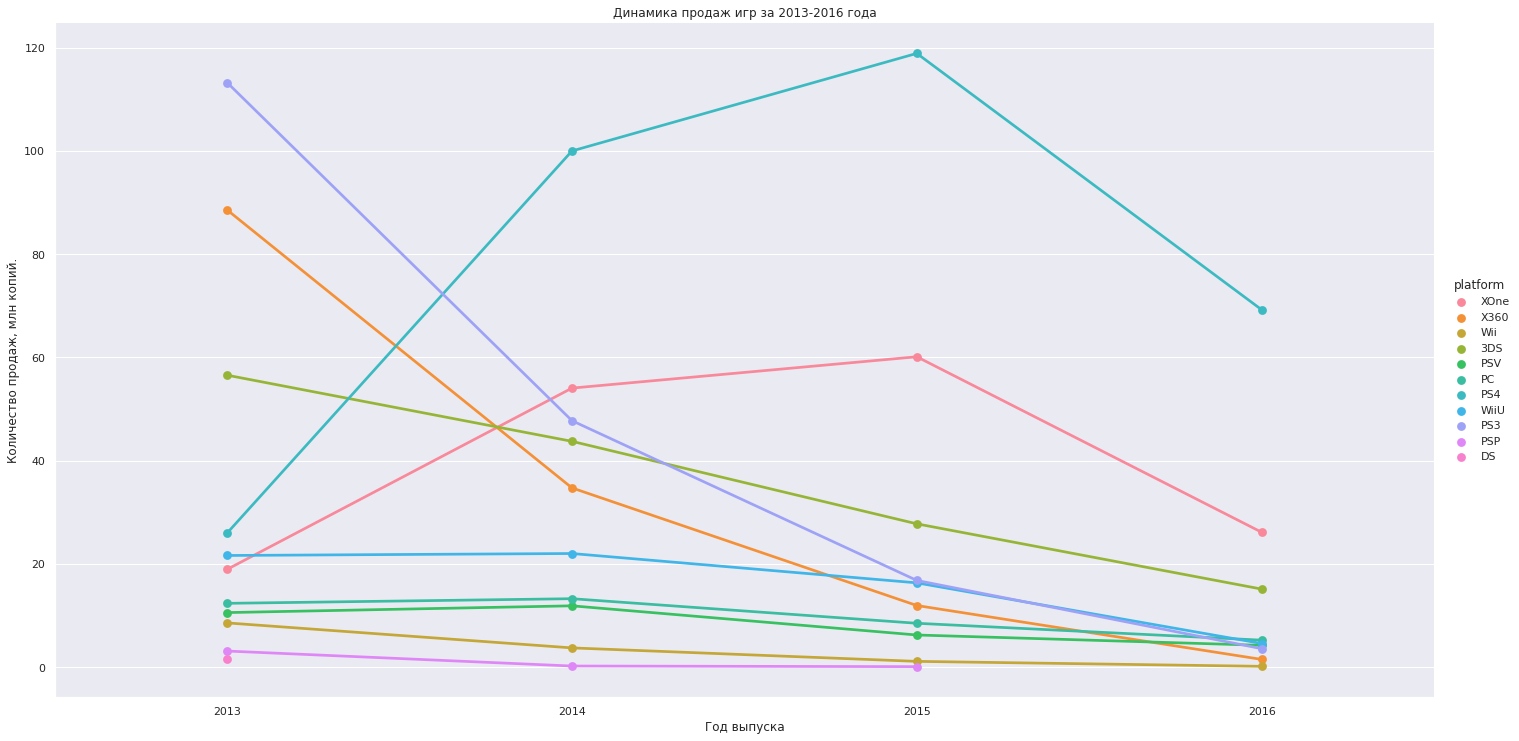

In [26]:
ax=seaborn.catplot(x="year_of_release",
            y="total_sales",
            hue="platform",
            kind="point", 
            height=10,
            aspect=2,
            data=pivot_new) 
ax.set(xlabel='Год выпуска', ylabel='Количество продаж, млн копий.', title='Динамика продаж игр за 2013-2016 года')


Построим обновленный график

Видно, что все платформы демонстрируют снижение продаж. Среди них, однако, есть PS4, которые стали продаваться сравнительно недавно и за последние года стали лидерами продаж (относительно других). Аналогично можно рассуждать и про XOne. Можно предположить, что эти 2 платформы могут представлять интерес в дальнейшем. Платформы PC и PSV не отличаются высокими показателями продаж или ростом, но наблюдаются более менее стабильные данные. Возможно, эти платформы тоже стоить "взять на заметку". 

В свою очередь PS3 и X360 сильно снизили свои показатели и продолжают падать с 2013 года. Ставку на них делать не стоит. Платформа Wii также не представляется надежной. Платформа WiiU показывает нерезкое, но все же снижение продаж.

Платформу DS здесь не стоит учитывать, так как она перестала выпускать игры в 2013 году.


**«Ящик с усами»**

(0.0, 1.8)

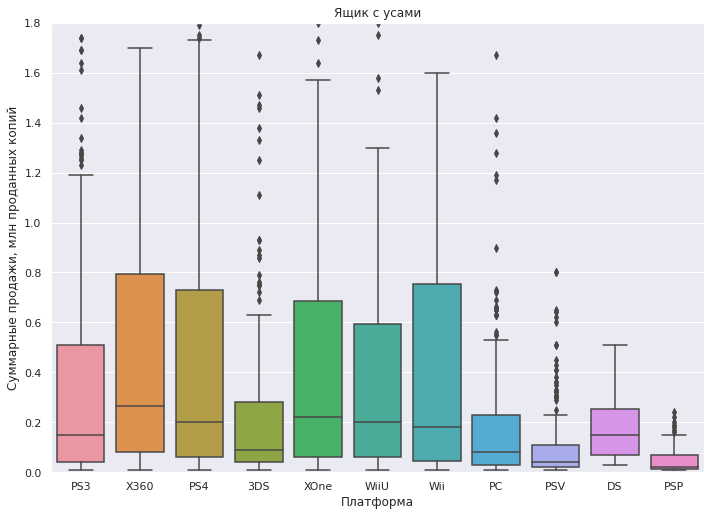

In [27]:
ax=seaborn.boxplot(x=games['platform'], y=games['total_sales'])
ax.set(xlabel='Платформа', ylabel='Суммарные продажи, млн проданных копий', title='Ящик с усами')
plt.ylim(0, 1.8)

За период 2013-2016 года медиана проданных копий X360, XOne, WiiU и Wii оказались  выше остальных анализируемых платформ. Наиболее низкие медианы продаж наблюдаются у PSP, PSV, PC и 3DS. Выбросы в данных (редкие значения, выходящие за пределы "усов") наблюдаются почти у всех платформ на диаграмме.

Известно, что нижняя граница "ящика" соответствует 25-й процентили, а верхняя - 75-ой процентили. Другими словами, 25% наших наблюдений о продажах по каждой платформе имеют значения ниже 25-й процентили, а другие 25% имеющихся наблюдений выше 75-й процентили. Соответственно, половина наблюдений расположена в пределах "ящика". Нижние границы ящиков лежат у всех платформах прмерно в одинаковом диапазоне, а 75-й процентиль различается. Также у PS4 самая высокая граница верхнего "уса", далее идет верхний "ус" "ящика" платформы X360. Это же подтверждается и графиком выше, весь максимальные значения продаж за исследуемый период у этих платформ именно такой: наибольшее значение продаж было достигнуто платформой PS4 в 2015 году, затем следует XOne с пиком продаж тоже в 2015 году (но меньшим по сравнению с PS4).

Мы видим, что некоторые "ящики" оказались короче других. Это означает, что суммарные продажи у "коротких ящиков" (например, у платформы  PSV) различаются между собой в меньшей степени, чем продажи внутри платформ с "длинными ящиками" (например,  у XOne). Проводя сравнение с графиком выше, мы действительно видим, что продажи внутри платформы PSV выглядят не такими динамичными, как у XOne.


**Влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

Возьмем в качестве примера самые "продаваемые" платформы за недавний период: PS4 и XOne

-0.031957110204556376

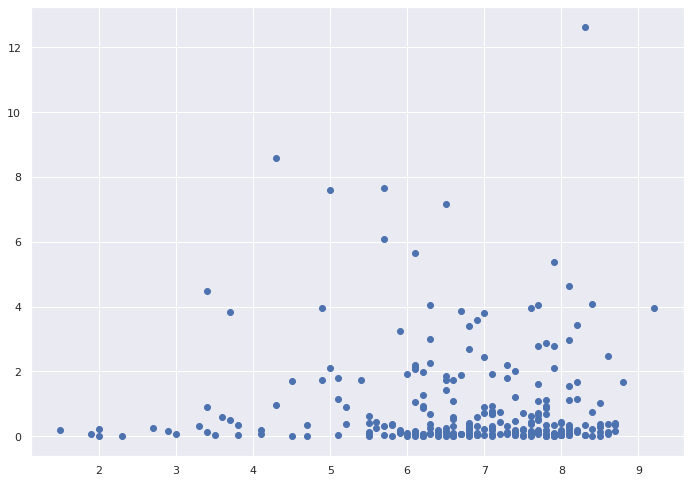

In [28]:
PS4_corr=games[games['platform']=='PS4']
plt.scatter(PS4_corr['user_score'], PS4_corr['total_sales'])
PS4_corr['user_score'].corr(PS4_corr['total_sales'])

Явной корреляции между отзывами пользователей и количеством продаж игр платформы PS4 не выявлено. Значение -0,03 далеко от крайнего 1 или -1.

Возьмем также платформу XOne

-0.06892505328279414

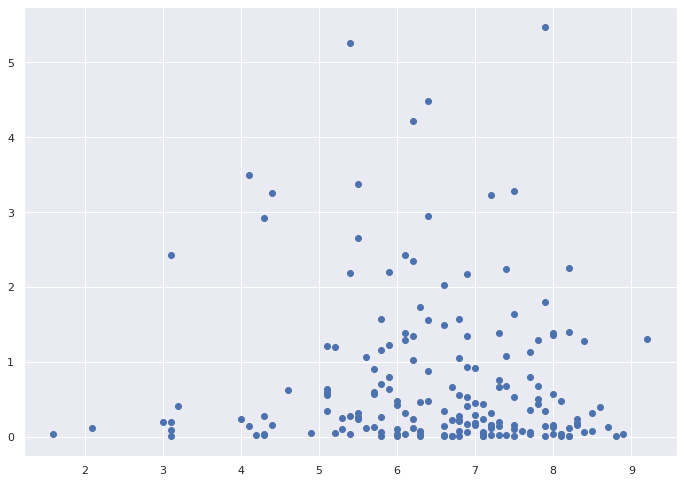

In [29]:
XOne_corr=games[games['platform']=='XOne']
plt.scatter(XOne_corr['user_score'], XOne_corr['total_sales'])
XOne_corr['user_score'].corr(XOne_corr['total_sales'])

Корреляции между продажами игр популярных за недавний период платформ PS4, XOne и отзывами пользователей не выявлено.

Посмотрим теперь корреляцию между отзывами критиков и продажами по этим же самым платформам.

0.40656790206178095

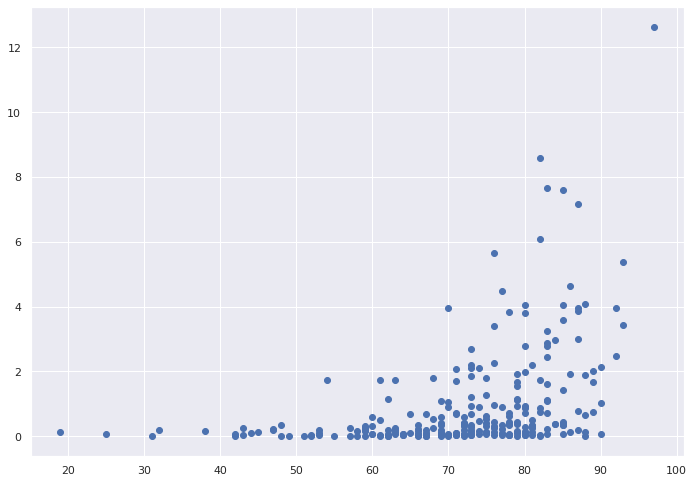

In [30]:
PS4_corr_critic=games[games['platform']=='PS4']
plt.scatter(PS4_corr_critic['critic_score'], PS4_corr_critic['total_sales'])
PS4_corr_critic['critic_score'].corr(PS4_corr_critic['total_sales'])

0.4169983280084017

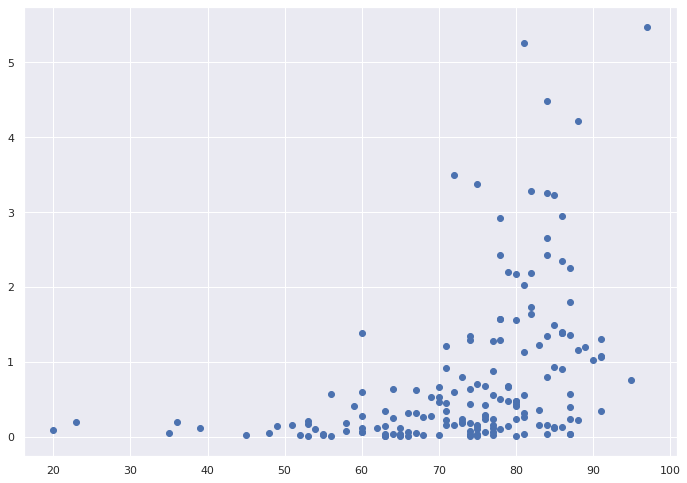

In [31]:
XOne_corr_critic=games[games['platform']=='XOne']
plt.scatter(XOne_corr_critic['critic_score'], XOne_corr_critic['total_sales'])
XOne_corr_critic['critic_score'].corr(XOne_corr_critic['total_sales'])

Выявлена корреляция между отзывами критиков и количеством продаж в обоих случаях.

Возьмем в качестве примера менее "продаваемые" платформы за исследуемый период: PC и PSV

-0.0938418695247674

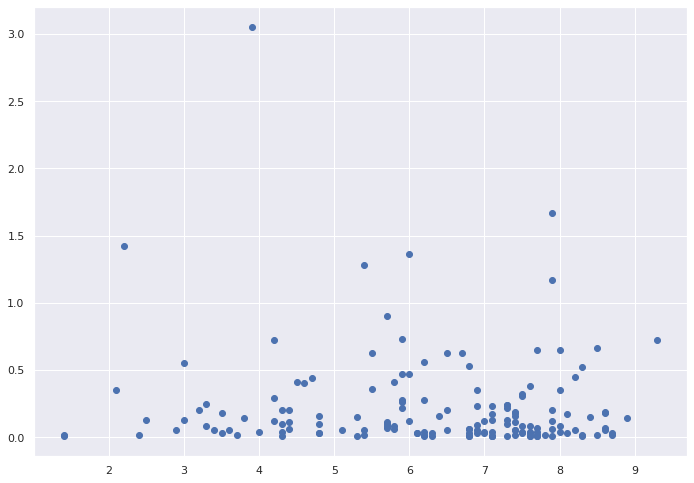

In [32]:
PC_corr=games[games['platform']=='PC']
plt.scatter(PC_corr['user_score'], PC_corr['total_sales'])
PC_corr['user_score'].corr(PC_corr['total_sales'])

0.0009424723319108626

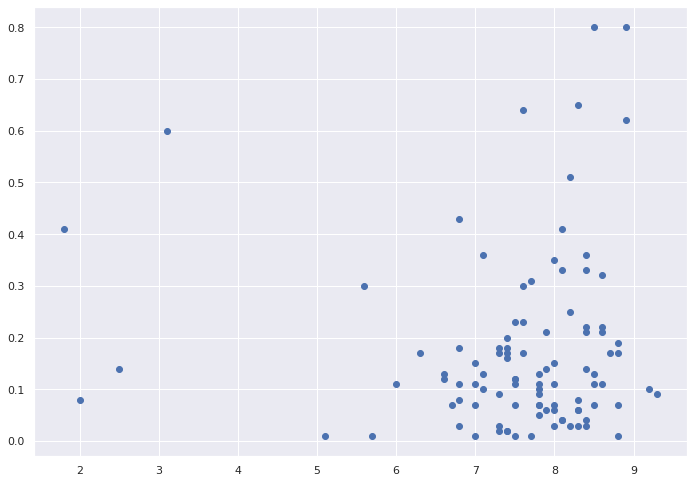

In [33]:
PSV_corr=games[games['platform']=='PSV']
plt.scatter(PSV_corr['user_score'], PSV_corr['total_sales'])
PSV_corr['user_score'].corr(PSV_corr['total_sales'])

Корреляции между продажами менее "продаваемых" платформ и отзывами пользователей также не выявлено.

0.19603028294369382

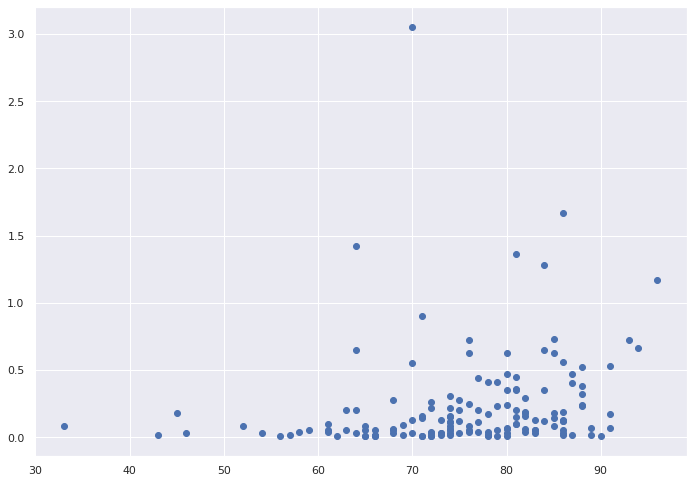

In [34]:
PC_corr_critic=games[games['platform']=='PC']
plt.scatter(PC_corr_critic['critic_score'], PC_corr_critic['total_sales'])
PC_corr_critic['critic_score'].corr(PC_corr_critic['total_sales'])

0.2547423503068656

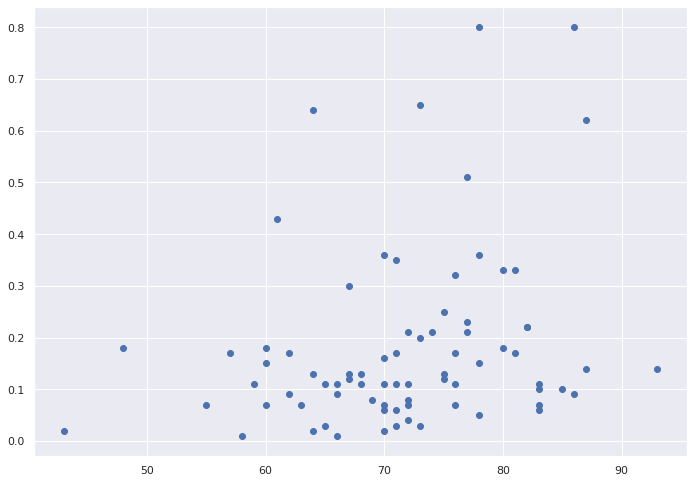

In [35]:
PSV_corr_critic=games[games['platform']=='PSV']
plt.scatter(PSV_corr_critic['critic_score'], PSV_corr_critic['total_sales'])
PSV_corr_critic['critic_score'].corr(PSV_corr_critic['total_sales'])

В случае с платформой PC небольшая корреляция с отзывами критиков есть, но слабее, чем с "продаваемыми" платформами. В случае с платформой PSV соответственная корреляция также выглядит слабее.

**Общее распределение игр по жанрам**

,genre,total_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


Text(0, 0.5, 'Продажи, млн проданных копий')

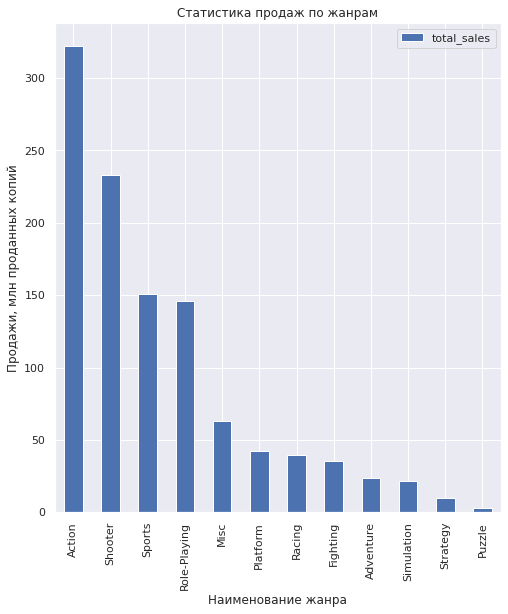

In [36]:
pivot_for_genre=games.pivot_table(index=['genre'], values='total_sales', aggfunc=['sum']).reset_index()
pivot_for_genre.columns=['genre', 'total_sales']
pivot_for_genre=pivot_for_genre.sort_values('total_sales', ascending = False)
display(pivot_for_genre)
ax=pivot_for_genre.plot(x='genre', y='total_sales', kind='bar', figsize=(8,9), title='Статистика продаж по жанрам')
ax.set_xlabel("Наименование жанра")
ax.set_ylabel("Продажи, млн проданных копий")

Судя по графику, за период с 2013 по 2016 год наиболее популярными оказались жанры " Action", "Sports", "Shooter"; самый высокий показатель в млн проданных копий наблюдается у игр с жанром "Action".

,genre,total_sales
8,Shooter,0.450
10,Sports,0.240
4,Platform,0.225
7,Role-Playing,0.125
2,Fighting,0.125
6,Racing,0.120
0,Action,0.110
9,Simulation,0.100
3,Misc,0.100
11,Strategy,0.080


Text(0, 0.5, 'Продажи, млн проданных копий')

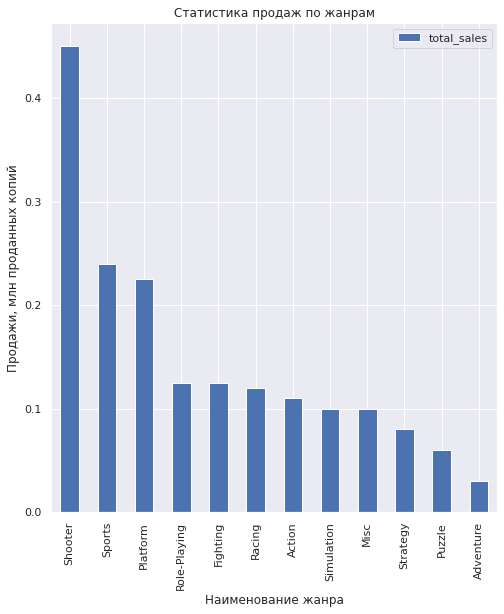

In [37]:
pivot_for_genre=games.pivot_table(index=['genre'], values='total_sales', aggfunc=['median']).reset_index()
pivot_for_genre.columns=['genre', 'total_sales']
pivot_for_genre=pivot_for_genre.sort_values('total_sales', ascending = False)
display(pivot_for_genre)
ax=pivot_for_genre.plot(x='genre', y='total_sales', kind='bar', figsize=(8,9), title='Статистика продаж по жанрам')
ax.set_xlabel("Наименование жанра")
ax.set_ylabel("Продажи, млн проданных копий")

Анализируя медианы продаж (они более устойчивы к выбросам) за 2013-2016 года, можно увидеть, что продажи на одну игру в жанре Shooter оказались выше остальных, а Action наоборот значительно ниже, чем в Shooter и Sports. Видимо, действительно, на суммарные продажи значительное влияние оказывают продажи игр бестселлеров, из-за чего его общие продажи могли оказаться максимальными. 

**Промежуточный вывод к Шагу 3:**

Посмотрели, сколько игр выпускала каждая платформа в разные годы с 1980 по 2016: пик пришелся на 2008 год с выпуском 1400 игр.

Понаблюдали, как менялись продажи по платформам и выбрали платформы с наибольшими суммарными продажами, построив распределение по годам: на графике Топ-10 наиболее "продаваемых" платформ за все года в выборке самой популярной оказалась PS2, было продано более 1,2 млрд копий; затем следует платформа X360, где было продано около 1 млрд копий. Затем мы построили распределение по годам по всем 10 платформам отдельно и увидели общий тренд: наиболее высокие показатели продаж у рассмотренных платформ наблюдались максимум в течение 5 лет. Периодически появлялись новые и исчезали старые платформы, причем у каждой продолжительность существования своя, но в основном рассмотренные платформы осуществляли продажи в течение 10-11 лет. Среди новых платформ, которые стали осуществлять продажи сравнительно недавно можно выделить: PS4, XOne в 2013, WiiU в 2012 и PSV  в 2011 году, продолжавшие осуществлять продажи и в 2016 году.

Определили актуальный период: 2013-2016 год и дальше работали только с ним.

Построили график, где попробовали отследить динамику продаж за актуальный период и выбрали несколько потенциально прибыльных платформ: видно, что все платформы демонстрируют снижение продаж. Среди них, однако, есть PS4, которые стали продаваться сравнительно недавно и за последние года стали лидерами продаж (относительно других). Аналогично можно рассуждать и про XOne. Можно предположить, что эти 2 платформы могут представлять интерес в дальнейшем. Платформы PC и PSV не отличаются высокими показателями продаж или ростом, но наблюдаются более менее стабильные данные. Возможно, эти платформы тоже стоить "взять на заметку".

Построили "Ящик с усами" за период 2013-2016 года: медианы проданных копий X360, XOne, WiiU и Wii оказались  выше остальных анализируемых платформ. Наиболее низкие медианы продаж наблюдаются у PSP, PSV, PC и 3DS. Выбросы в данных (редкие значения, выходящие за пределы "усов") наблюдаются почти у всех платформ на диаграмме.
У PS4 наблюдается самая высокая граница верхнего "уса", далее идет верхний "ус" "ящика" платформы X360. Это же подтверждается и графиком выше, весь максимальные значения продаж за исследуемый период у этих платформ именно такой: наибольшее значение продаж было достигнуто платформой PS4 в 2015 году, затем следует XOne с пиком продаж тоже в 2015 году (но меньшим по сравнению с PS4).

Мы видим, что некоторые "ящики" оказались короче других. Это означает, что суммарные продажи у "коротких ящиков" (например, у платформы  PSV) различаются между собой в меньшей степени, чем продажи внутри платформ с "длинными ящиками" (например,  у XOne). Проводя сравнение с графиком выше, мы действительно видим, что продажи внутри платформы PSV выглядят не такими динамичными, как у XOne.

Корреляции между отзывами пользователей и продажами выбранных для анализа популярных платформ не выявлено, а между отзывами критиков и соответствующими продажами выявлено: с ростом оценки критиков, вырастает показатель продаж.

Наиболее приьыльными оказались жанры " Action", "Sports", "Shooter" по оценке суммарных продаж; а по оценке показателей медиан внутри одного жанра продажи на одну игру Shooter оказались выше остальных, а Action наоборот значительно ниже, чем в Shooter и Sports. 


# Шаг 4. Портрет пользователя каждого региона

Построим круговые диаграммы, чтобы лучше увидеть самые популярные платформы (топ-5) по регионам и их доли продаж.

In [38]:
data_for_eu=games.pivot_table(index=['platform'], values='eu_sales', aggfunc=['sum']).reset_index()
data_for_eu.columns=['platform', 'eu_sales']
data_for_eu=data_for_eu.sort_values('eu_sales', ascending = False)
data_for_eu

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96
2,PC,25.36
8,WiiU,19.85
6,PSV,6.10
7,Wii,5.93
1,DS,0.85


Text(0.5, 1.0, 'Доли продаж Топ-5 популярных платформ в Европе')

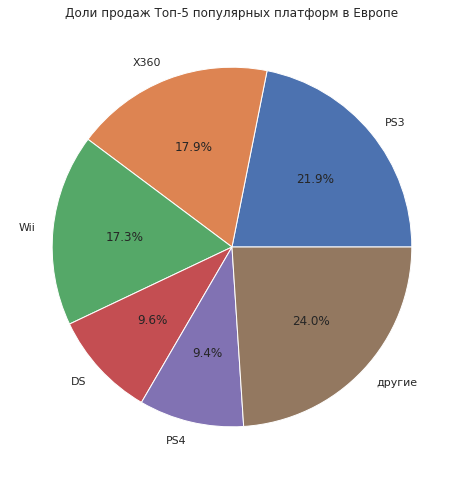

In [39]:
labels = 'PS3', 'X360', 'Wii', 'DS', 'PS4', 'другие'
sizes = [327.21, 267.89, 258.32, 142.99, 141.09, 358.5]

fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Доли продаж Топ-5 популярных платформ в Европе')

In [40]:
data_for_na=games.pivot_table(index=['platform'], values='na_sales', aggfunc=['sum']).reset_index()
data_for_na.columns=['platform', 'na_sales']
data_for_na=data_for_na.sort_values('na_sales', ascending = False)
data_for_na

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20
8,WiiU,29.21
2,PC,11.11
7,Wii,6.56
6,PSV,5.04
1,DS,0.57


Text(0.5, 1.0, 'Доли продаж Топ-5 популярных платформ в Северной Америке')

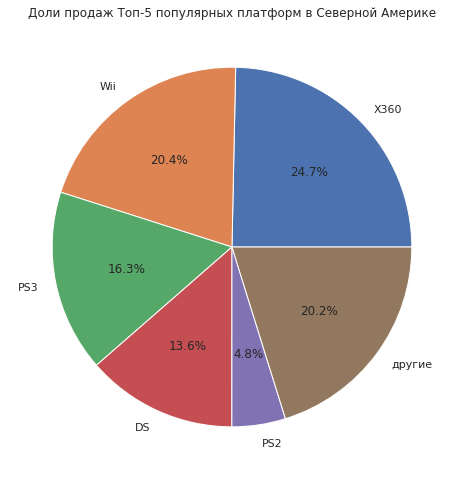

In [41]:
labels = 'X360', 'Wii', 'PS3', 'DS', 'PS2', 'другие'
sizes = [588.84, 486.87, 390.13, 323.99, 114.89, 481.98]

fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Доли продаж Топ-5 популярных платформ в Северной Америке')

In [42]:
data_for_jp=games.pivot_table(index=['platform'], values='jp_sales', aggfunc=['sum']).reset_index()
data_for_jp.columns=['platform', 'jp_sales']
data_for_jp=data_for_jp.sort_values('jp_sales', ascending = False)
data_for_jp

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88
5,PSP,3.29
9,X360,0.51
10,XOne,0.34
7,Wii,0.05
1,DS,0.00


Text(0.5, 1.0, 'Доли продаж Топ-5 популярных платформ в Японии')

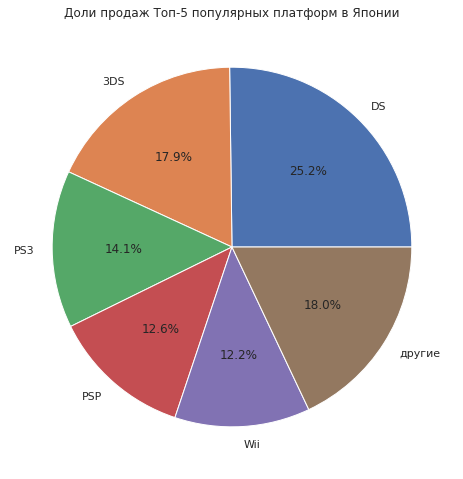

In [43]:
labels = 'DS', '3DS', 'PS3', 'PSP', 'Wii', 'другие'
sizes = [141.49, 100.62, 79.41, 70.63, 68.28, 100.88]

fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Доли продаж Топ-5 популярных платформ в Японии')

Построили круговые диаграммы для долей продаж по платформам в Европе, Северной Америке и Японии за 2013-2016 года. Наибольшую долю продаж в Европе, Северной Америке и Японии составили игры платформ PS3, X360, DS соответственно.

Стоит также отметить, что во всех регионах довольно популярны платформы PS3, DS и Wii; платформа X360 популярна в Европе и Северной Америке в большей степени, чем в Японии. Платформа PSP, наоборот, популярна в основном в Японии.

Теперь понаблюдаем за долями продаж топ-5 популярных жанров

In [44]:
genre_for_eu=games.pivot_table(index=['genre'], values='eu_sales', aggfunc=['sum']).reset_index()
genre_for_eu.columns=['genre', 'eu_sales']
genre_for_eu=genre_for_eu.sort_values('eu_sales', ascending = False)
genre_for_eu

,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19
3,Misc,20.04
4,Platform,15.58
9,Simulation,10.92
2,Fighting,8.55
1,Adventure,8.25


Text(0.5, 1.0, 'Доли продаж Топ-5 популярных жанров в Европе')

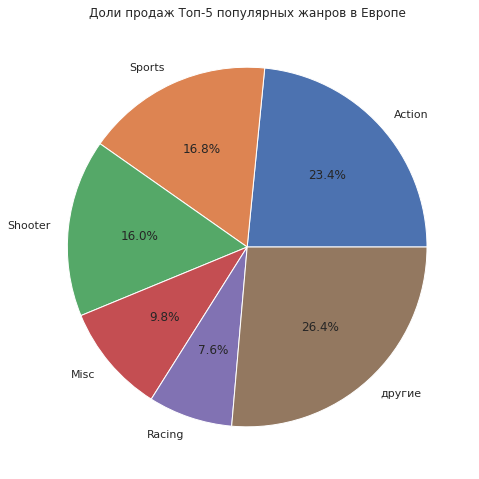

In [45]:
labels = 'Action', 'Sports', 'Shooter', 'Misc', 'Racing', 'другие'
sizes = [350.70, 251.55, 238.89, 146.88, 113.39, 394.59]

fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Доли продаж Топ-5 популярных жанров в Европе')

In [46]:
genre_for_na=games.pivot_table(index=['genre'], values='na_sales', aggfunc=['sum']).reset_index()
genre_for_na.columns=['genre', 'na_sales']
genre_for_na=genre_for_na.sort_values('na_sales', ascending = False)
genre_for_na['na_sales'].sum()
genre_for_na

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49
4,Platform,18.14
2,Fighting,15.55
6,Racing,12.96
1,Adventure,7.14
9,Simulation,4.86


Text(0.5, 1.0, 'Доли продаж Топ-5 популярных жанров в Северной Америке')

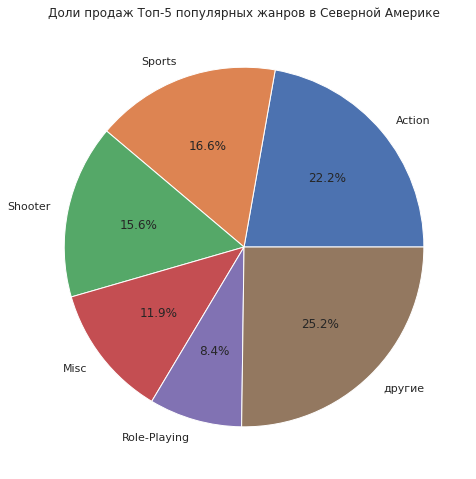

In [47]:
labels = 'Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing', 'другие'
sizes = [530.44, 396.64, 373.13, 285.06, 199.63, 601.77]

fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Доли продаж Топ-5 популярных жанров в Северной Америке')

In [48]:
genre_for_jp=games.pivot_table(index=['genre'], values='jp_sales', aggfunc=['sum']).reset_index()
genre_for_jp.columns=['genre', 'jp_sales']
genre_for_jp=genre_for_jp.sort_values('jp_sales', ascending = False)
genre_for_jp

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61
1,Adventure,5.82
10,Sports,5.41
4,Platform,4.79
9,Simulation,4.52
6,Racing,2.30


Text(0.5, 1.0, 'Доли продаж Топ-5 популярных жанров в Японии')

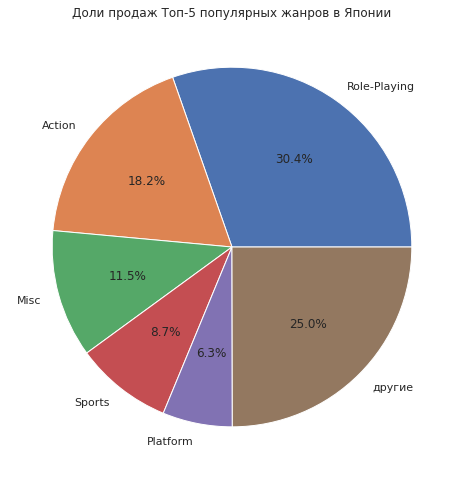

In [49]:
labels = 'Role-Playing', 'Action', 'Misc', 'Sports', 'Platform', 'другие'
sizes = [170.38, 102.07, 64.53, 48.97, 35.20, 140.15]

fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Доли продаж Топ-5 популярных жанров в Японии')

Построили круговые диаграммы для Топ-5 самых популярных жанров по трем регионам. Самыми "продаваемыми" оказались жанры Action в Европе и Северной Америке, а также Role-Playing в Японии. Жанр Sports оказался популярным в большей степени в Европе и Северной Америке, чем в Японии. Жанр Misc оказался также популярен во всех изучаемых регионах.

In [50]:
esrb=games.pivot_table(index='rating', values=['eu_sales', 'na_sales', 'jp_sales'], aggfunc='sum').reset_index()
esrb

,rating,eu_sales,jp_sales,na_sales
0,E,83.36,15.14,79.05
1,E10+,42.69,5.89,54.24
2,M,145.32,14.11,165.21
3,T,41.95,20.59,49.79


Игры с рейтингом 'E' ("Для всех")и 'Е10+' ("Для всех от 10 лет и старше") оказались более популярны в Европе и Северной Америке. Рейтинг 'M' ("Для взрослых") оказался самым "продаваемым" также в этих двух регионах, а игры с рейтингом 'T' ("Подросткам") стали самыми популярными в Японии. 

Подводя итог Шага 4, можно попробовать составить портрет каждого пользователя в Европе, Северной Америке и Японии. 

Видно, что пользователи в Европе и Северной Америке предпочитают жанр Action, в то время как в Японии больше покупают игры с жанром Role-Playing. PS3, X360, DS во всех трех регионах оказались популярными. Также стоит учесть и рейтинг ERSB: наиболее популярными играми в нашей выборке по Европе и Северной Америке оказались игры жанром 'M' ("Для взрослых"), а в Японии игры с рейтингом 'T' ("Подросткам"). 

# Шаг 5. Проверка гипотез

**Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?**

Сформулируем нулевую и альтернативную гипотезы:

H0: между средними значениями двух совокупностей данных о рейтингах Xbox One и PC нет разницы, они равны

H1: средние значения двух совокупностей данных о рейтингах платформ Xbox One и PC не равны.

In [51]:
# Воспользуемся следующим методом для проверки гипотезы о равенстве среднего:

alpha=0.05
xone_for_hyp = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_for_hyp = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
result = st.ttest_ind(xone_for_hyp, pc_for_hyp)

print('p-значение:', result.pvalue)
if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Нет оснований отвергнуть нулевую гипотезу


Есть основания полагать, что средняя оценка пользователей платформы XOne равна средней оценке пользователей платформы PC

**Одинаковы ли средние пользовательские рейтинги жанров Action и Sports?**

Сформулируем нулевую и альтернативную гипотезы:

H0: между средними значениями двух совокупностей данных о рейтингах жанров Action и Sports нет разницы, они равны

H1: средние значения двух совокупностей данных о рейтингах жанров Action и Sports не равны.

In [52]:
# Воспользуемся следующим методом для проверки гипотезы о равенстве среднего:

alpha=0.05
action_for_hyp = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports_for_hyp = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
result = st.ttest_ind(action_for_hyp, sports_for_hyp)

print('p-значение:', result.pvalue)
if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Есть основания полагать, что в среднем пользовательские рейтинги жанров Action и Sports не равны между собой

# Шаг 6. Вывод

> В данной работе мы провели анализ данных о продажах компьютерных игр интернет-магазина "Стримчик" с 1980 до 2016 года. Перед нами была поставлена задача проанализировать данные и выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

> На Шаге 1 мы открыли предоставленный на файл с данными и изучили общую информацию. У нас было 16715 наблюдений с 1980 по 2016 года. Стало ясно, что данные нуждаются в предобработке, поэтому на Шаге 2 были выпонены следующие шаги: привели к нижнему регистру названия столбцов; изменили тип данных в столбцах, где это было уместно/необходимо; обработали пропуски в тех столбцах, где это было возможно; создали новый столбец `total_sales` с суммарными продажами во всех регионах, а также осуществили проверку наличия дубликатов. 

> Затем мы перешли к исследовательскому анализу данных на Шаг 3. Посмотрели, сколько игр выпускала каждая платформа в разные годы с 1980 по 2016: пик пришелся на 2008 год с выпуском 1400 игр. Выявили Топ-10 наиболее "продаваемых" платформ за все года в выборке самой популярной оказалась PS2 (было продано более 1,2 млрд копий); затем следует платформа X360 (было продано около 1 млрд копий).  Наиболее высокие показатели продаж у рассмотренных платформ наблюдались максимум в течение 5 лет. 

> Периодически появлялись новые и исчезали старые платформы, причем у каждой продолжительность существования своя, но в основном рассмотренные платформы осуществляли продажи в течение 10-11 лет. Среди новых платформ, которые стали осуществлять продажи сравнительно недавно можно выделить: PS4, XOne в 2013, WiiU в 2012 и PSV  в 2011 году, продолжавшие осуществлять продажи и в 2016 году. 

> Для большинства платформ прослеживалась общая динамика: сначала платформы растут, достигают пика, затем происходит спад. Время подъема и достижения пика продаж у каждой платформы происходило в течение 3-4 лет, поэтому в качестве актуального периода мы взяли 2013-2016 года.

> Отследив на графике динамику продаж за актульный период и выбрали несколько потенциально прибыльных платформ: видно, что все платформы демонстрируют снижение продаж. Среди них, однако, есть PS4, которые стали продаваться сравнительно недавно и за последние года стали лидерами продаж (относительно других). Аналогично можно рассуждать и про XOne. Можно предположить, что эти 2 платформы могут представлять интерес в дальнейшем. Платформы PC и PSV не отличаются высокими показателями продаж или ростом, но наблюдаются более менее стабильные данные. Возможно, эти платформы тоже стоить "взять на заметку".

> Построили "Ящик с усами" за период 2013-2016 года: за период 2013-2016 года медиана проданных копий X360, XOne, WiiU и Wii оказались  выше остальных анализируемых платформ. Наиболее низкие медианы продаж наблюдаются у PSP, PSV, PC и 3DS. Выбросы в данных (редкие значения, выходящие за пределы "усов") наблюдаются почти у всех платформ на диаграмме.

> У PS4 самая высокая граница верхнего "уса", далее идет верхний "ус" "ящика" платформы X360. Это же подтверждается и графиком выше, весь максимальные значения продаж за исследуемый период у этих платформ именно такой: наибольшее значение продаж было достигнуто платформой PS4 в 2015 году, затем следует XOne с пиком продаж тоже в 2015 году (но меньшим по сравнению с PS4).

> Мы видим, что некоторые "ящики" оказались короче других. Это означает, что суммарные продажи у "коротких ящиков" (например, у платформы  PSV) различаются между собой в меньшей степени, чем продажи внутри платформ с "длинными ящиками" (например,  у XOne). Проводя сравнение с графиком выше, мы действительно видим, что продажи внутри платформы PSV выглядят не такими динамичными, как у XOne.

> Корреляции между отзывами пользователей и продажами выбранных для анализа популярных платформ не выявлено, а между отзывами критиков и соответствующими продажами выявлено: с ростом оценки критиков, вырастает показатель продаж.

> По суммарным показателям продаж наиболее популярными оказались жанры " Action", "Sports", "Shooter"; а по оценке показателей медиан внутри одного жанра продажи на одну игру Shooter оказались выше остальных, а Action наоборот значительно ниже, чем в Shooter и Sports. 


> На Шаге 4 мы попытались составить портрет пользователя каждого региона в выборке, а именно в Северной Америке, Европе и Японии. Визуализировав информацию с помощью графиков, выявили, что пользователи в Европе и Северной Америке предпочитают жанр Action, в то время как в Японии больше покупают игры с жанром Role-Playing. PS3, X360, DS во всех трех регионах оказались популярными. Игры с рейтингом 'E' ("Для всех")и 'Е10+' ("Для всех от 10 лет и старше") оказались более популярны в Европе и Северной Америке. Рейтинг 'M' ("Для взрослых") оказался самым "продаваемым" также в этих двух регионах, а игры с рейтингом 'T' ("Подросткам") стали самыми популярными в Японии. . 

> На Шаге 5 проверили ряд гипотез о равенстве средних пользовательских рейтингов платформ Xbox One и PC, а также средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»). Выяснили, что есть основания полагать, что средняя оценка пользователей платформы XOne равна средней оценке пользователей платформы PC. Также нет оснований полагать, что средние пользовательские рейтинги вышеупомянутых жанров равны.

**Итог для прогноза на 2017 год**

Подводя итог, мы видим, что продажи в целом демонстрируют тенденцию на снижение на всех платформах. Но все же, для возможного оживления рынка и составления плана маркетинговой кампании на перспективу 2017 года стоит обратить внимание на такие платформы как, например, PS4 и XOne; сфокусироваться на играх с жанрами " Action", "Sports", "Shooter" и контентом, ориентированным на широкую публику (например, с рейтингами 'E' ("Для всех") и 'M' ("Для взрослых") в Европе и Северной Америке, а в Японии 'T' ("Подросткам"). Стоит также учитывать среднюю продолжительность существования платформы а аткде тот факт, что рынок игр довольно динамичный, а значит время от времени появляются новые платформы, которые могут вытеснить своих конркурентов. Такие события необходимо также остслеживать и продумывать стратегии продаж.
